In [1]:
from bayes import Bayes         # for Bayes
import numpy as np              # for linspace
import scipy.stats as stats     # for binom, uniform
import matplotlib.pyplot as plt # for plot

%matplotlib inline

## Yesterday's Coin example

In [2]:
# here we're discretizing the heads probability p
p = np.linspace(0, 1, 101)

In [11]:
p_priors = { k:stats.uniform(0,1).pdf(k)/100 for k in p}

In [12]:
p_priors

{0.0: 0.01,
 0.01: 0.01,
 0.02: 0.01,
 0.029999999999999999: 0.01,
 0.040000000000000001: 0.01,
 0.050000000000000003: 0.01,
 0.059999999999999998: 0.01,
 0.070000000000000007: 0.01,
 0.080000000000000002: 0.01,
 0.089999999999999997: 0.01,
 0.10000000000000001: 0.01,
 0.11: 0.01,
 0.12: 0.01,
 0.13: 0.01,
 0.14000000000000001: 0.01,
 0.14999999999999999: 0.01,
 0.16: 0.01,
 0.17000000000000001: 0.01,
 0.17999999999999999: 0.01,
 0.19: 0.01,
 0.20000000000000001: 0.01,
 0.20999999999999999: 0.01,
 0.22: 0.01,
 0.23000000000000001: 0.01,
 0.23999999999999999: 0.01,
 0.25: 0.01,
 0.26000000000000001: 0.01,
 0.27000000000000002: 0.01,
 0.28000000000000003: 0.01,
 0.28999999999999998: 0.01,
 0.29999999999999999: 0.01,
 0.31: 0.01,
 0.32000000000000001: 0.01,
 0.33000000000000002: 0.01,
 0.34000000000000002: 0.01,
 0.35000000000000003: 0.01,
 0.35999999999999999: 0.01,
 0.37: 0.01,
 0.38: 0.01,
 0.39000000000000001: 0.01,
 0.40000000000000002: 0.01,
 0.41000000000000003: 0.01,
 0.4199999999

In [5]:
def coin_likelihood(data, p):
    # what is the likelihood of drawing data
    # given that the heads probability is p
    # data = 0 for tails, 1 for heads
    return(stats.binom(1, p).pmf(data))

I'm now creating an instance of that same `Bayes` object you used.

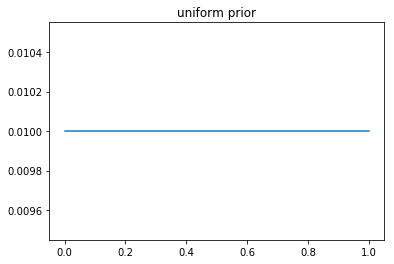

In [13]:
bayes = Bayes(p_priors.copy(), coin_likelihood)
bayes.plot(title="uniform prior")

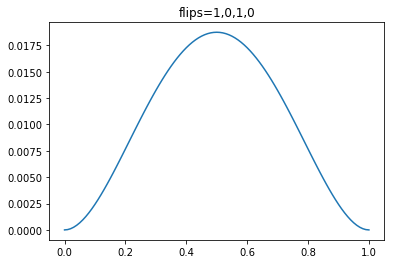

In [14]:
bayes.update(1) 
bayes.update(0) 
bayes.update(1)
bayes.update(0)

bayes.plot(title="flips=1,0,1,0")

Let's create a function to do that nicely...

In [15]:
def feed_bayes_and_plot(bayes, data_sequence):
    N = len(data_sequence)
    
    fig, axs = plt.subplots(1, N, figsize=(16, 3))
    
    # for each new data point
    for i, ax in enumerate(axs.flatten()):
        bayes.update(data_sequence[i])
        sorted_keys = sorted(bayes.prior.keys())
        sorted_probs = [bayes.prior[key] for key in sorted_keys]
        ax.plot(sorted_keys, sorted_probs)
        ax.set_title(",".join(map(str,data_sequence[0:i+1])))
        ax.get_yaxis().set_ticks([])
        if i==0:
            ax.set_ylabel('pdf')
        ax.set_xlabel('p')

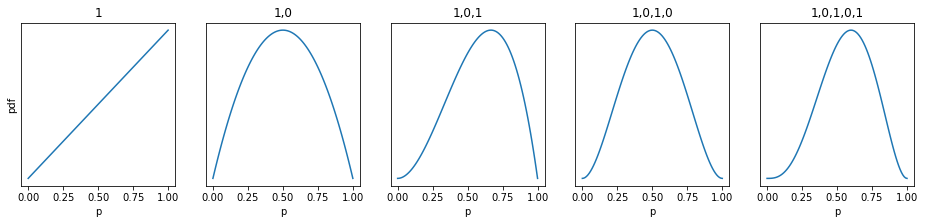

In [16]:
flips_A = [1,0,1,0,1]

bayesA = Bayes(p_priors.copy(), coin_likelihood)
feed_bayes_and_plot(bayesA, flips_A)

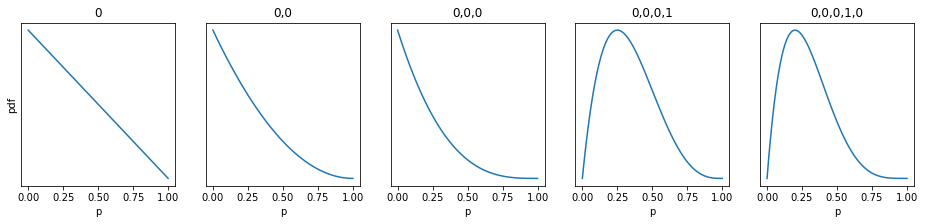

In [17]:
flips_B = [0,0,0,1,0]

bayesB = Bayes(p_priors.copy(), coin_likelihood)
feed_bayes_and_plot(bayesB, flips_B)

In [18]:
import scipy.stats as scs

In [34]:
clicks_A, views_A, clicks_B, views_B = 563, 1000, 551, 921
# let's draw values from those distribution models
sample_size = 10000

# model for A, fed with the right values
A_sample = stats.beta.rvs(1 + clicks_A,
                          1 + views_A - clicks_A,
                          size=sample_size)

# model for B, fed with the right values
B_sample = stats.beta.rvs(1 + clicks_B,
                          1 + views_B - clicks_B,
                          size=sample_size)

# let's find out the probability that A is better than B
print np.mean(A_sample > B_sample)

# we can also find the probability that p_A is larger than p_B by 0.05
print np.mean(A_sample > (B_sample + 0.05))

0.0644
0.0001


In [35]:
A_sample

array([ 0.56876995,  0.54590191,  0.61087518, ...,  0.56571497,
        0.56671442,  0.55816115])

In [36]:
B_sample

array([ 0.61930642,  0.59661415,  0.63519714, ...,  0.5881688 ,
        0.60397361,  0.5653485 ])

In [37]:
A_sample > B_sample

array([False, False, False, ..., False, False, False], dtype=bool)

In [38]:
sum(A_sample > B_sample)

644

In [39]:
np.mean(A_sample > B_sample)

0.064399999999999999

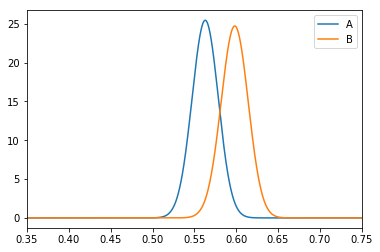

In [42]:
x = np.linspace(0,1,10000)
plt.plot(x, scs.beta(1+clicks_A, 1+ views_A - clicks_A).pdf(x), label='A')
plt.plot(x, scs.beta(1+clicks_B, 1+ views_B - clicks_B).pdf(x), label='B')
plt.xlim([0.35, 0.75])
plt.legend()

In [10]:
np.random.choice(['a', 'b', 'c'], size=30, p=[0.8, 0.1, 0.1])

array(['a', 'a', 'a', 'c', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a',
       'a', 'a', 'a', 'a'],
      dtype='|S1')

In [11]:
foo = np.array([2,5,1,7,9,6,3,2,5,8])

In [12]:
foo

array([2, 5, 1, 7, 9, 6, 3, 2, 5, 8])

In [13]:
foo[[1,1,1,4, 4, 4, 4]]

array([5, 5, 5, 9, 9, 9, 9])

In [14]:
bar = np.arange(10)

In [15]:
bar

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
foo > bar

array([ True,  True, False,  True,  True,  True, False, False, False, False], dtype=bool)

In [17]:
np.mean(foo > bar)

0.5

In [18]:
np.sum(foo>bar)

5

In [19]:
mask = foo > bar

In [20]:
mask

array([ True,  True, False,  True,  True,  True, False, False, False, False], dtype=bool)

In [21]:
foo[mask]

array([2, 5, 7, 9, 6])